In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score
from utils.preprocessing import preprocessing
from utils.scores import display_silhouettes, display_scores
from utils.display import display_clusters

# 1/ Dataset upload/overview

In [3]:
df = pd.read_csv("../data/kaya_dataset.csv")
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7745 entries, 0 to 7744
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              7745 non-null   object 
 1   year                 7745 non-null   int64  
 2   iso_code             7745 non-null   object 
 3   co2                  7745 non-null   float64
 4   energy               7745 non-null   float64
 5   gdp                  7745 non-null   float64
 6   population           7745 non-null   float64
 7   co2_per_unit_energy  7745 non-null   float64
 8   energy_per_gdp       7745 non-null   float64
 9   gdp_per_capita       7745 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 605.2+ KB
None


,year,co2,energy,gdp,population,co2_per_unit_energy,energy_per_gdp,gdp_per_capita
count,7745.000000,7745.000000,7.745000e+03,7.745000e+03,7.745000e+03,7745.000000,7745.000000,7745.000000
mean,1997.914009,169.430360,7.407782e+11,4.259151e+11,4.002676e+07,0.239455,1.674191,13025.601709
std,15.104324,683.710379,2.786040e+12,1.488989e+12,1.350935e+08,0.200058,1.631089,14718.564983
min,1965.000000,0.022000,9.765923e+07,1.642060e+08,6.408200e+04,0.018000,0.078000,361.188725
25%,1986.000000,3.691000,1.850453e+10,1.803369e+10,3.593782e+06,0.186000,0.767000,2808.878751
50%,1999.000000,20.870000,8.890039e+10,6.434611e+10,9.754398e+06,0.221000,1.245000,7828.856656
75%,2011.000000,84.838000,4.128210e+11,2.542891e+11,2.810118e+07,0.261000,2.053000,18309.742796
max,2022.000000,11711.808000,4.451869e+13,2.696602e+13,1.426437e+09,10.689000,25.253000,163531.400281


# 2/ data and feature selection

In [4]:
# countries selection :
countries = df.country.unique()
# year selection :
# years = df.year.unique()
years = [2022]  # only 2022
# common columns :
# cols = df.columns.tolist() # select all
cols = ['country', 'year', 'iso_code']
# features selection :
features_1 = ['co2', 'energy', 'gdp', 'population']
features_2 = ['co2_per_unit_energy', 'energy_per_gdp', 'gdp_per_capita']
features_3 = ['co2_per_unit_energy', 'energy_per_gdp', 'gdp_per_capita', 'population']
features = features_3

# kmeans parameters
kmax = 7 # max number of clusters
seed = 42 # seed for random functions (center first position)

# 3/ Results

In [5]:
def kmeans_training(X, k, seed):
    """kmeans training : dataset X, k clusters"""
    clusterer = KMeans(n_clusters=k, tol=1e-4, random_state=seed)
    cluster_labels = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    inertia = clusterer.inertia_
    return (cluster_labels, centers, inertia)


[[ 0.28598326 -0.84460884 -1.10659225  0.57769629]
 [-0.512507    0.34327211  0.72176019 -0.0353801 ]
 [ 0.99121444  0.25446013 -0.40614017 -0.71619577]]


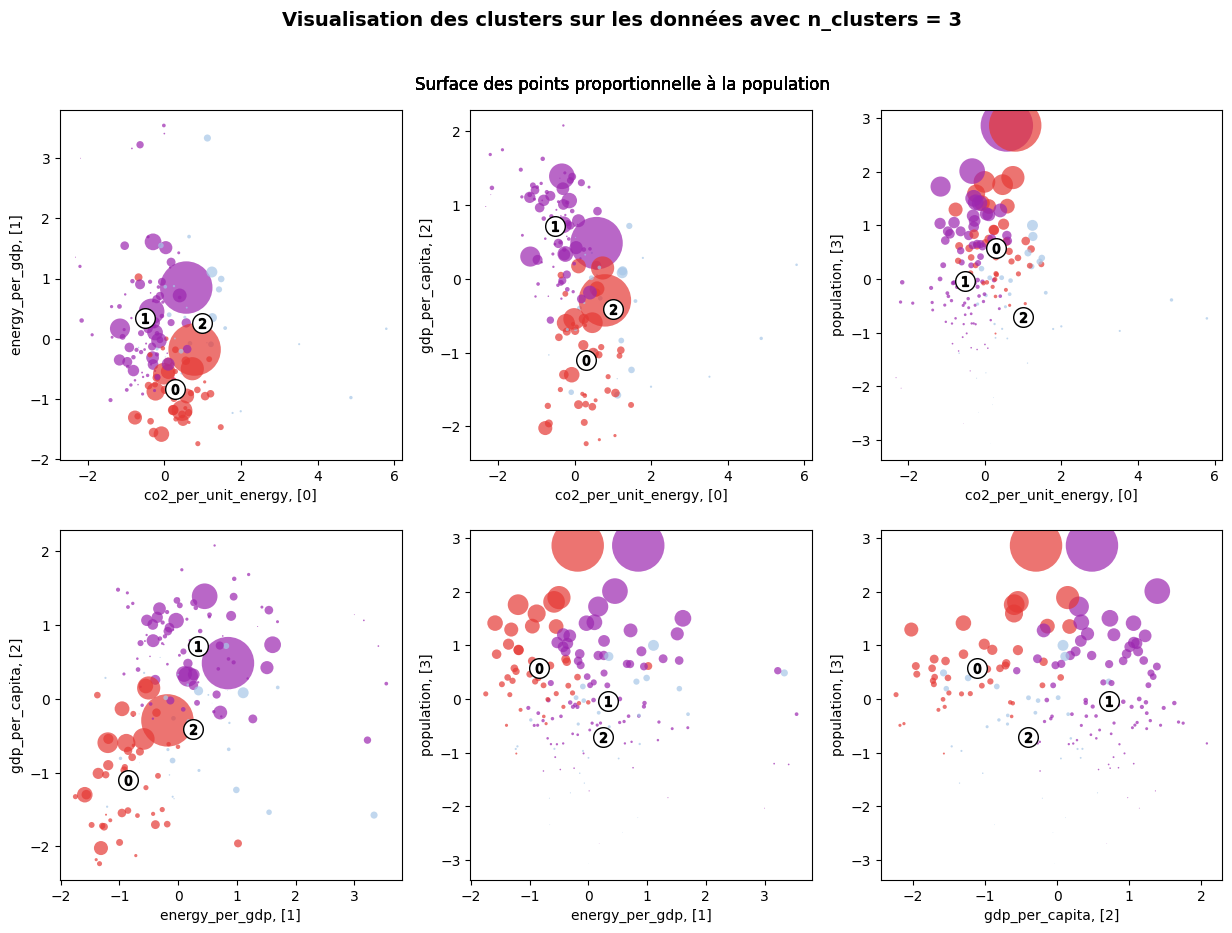

In [6]:
df, X =  preprocessing(df, years, countries, cols, features)
k = 3
cluster_labels, centers, inertia = kmeans_training(X, k, seed)
print(centers)
fig2 = display_clusters(X, k, features, centers, cluster_labels, df["population"])

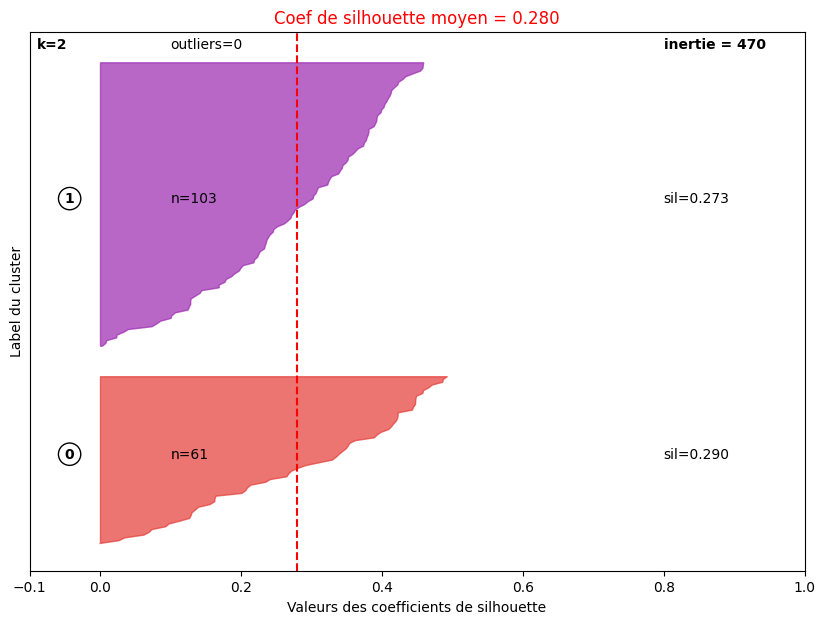

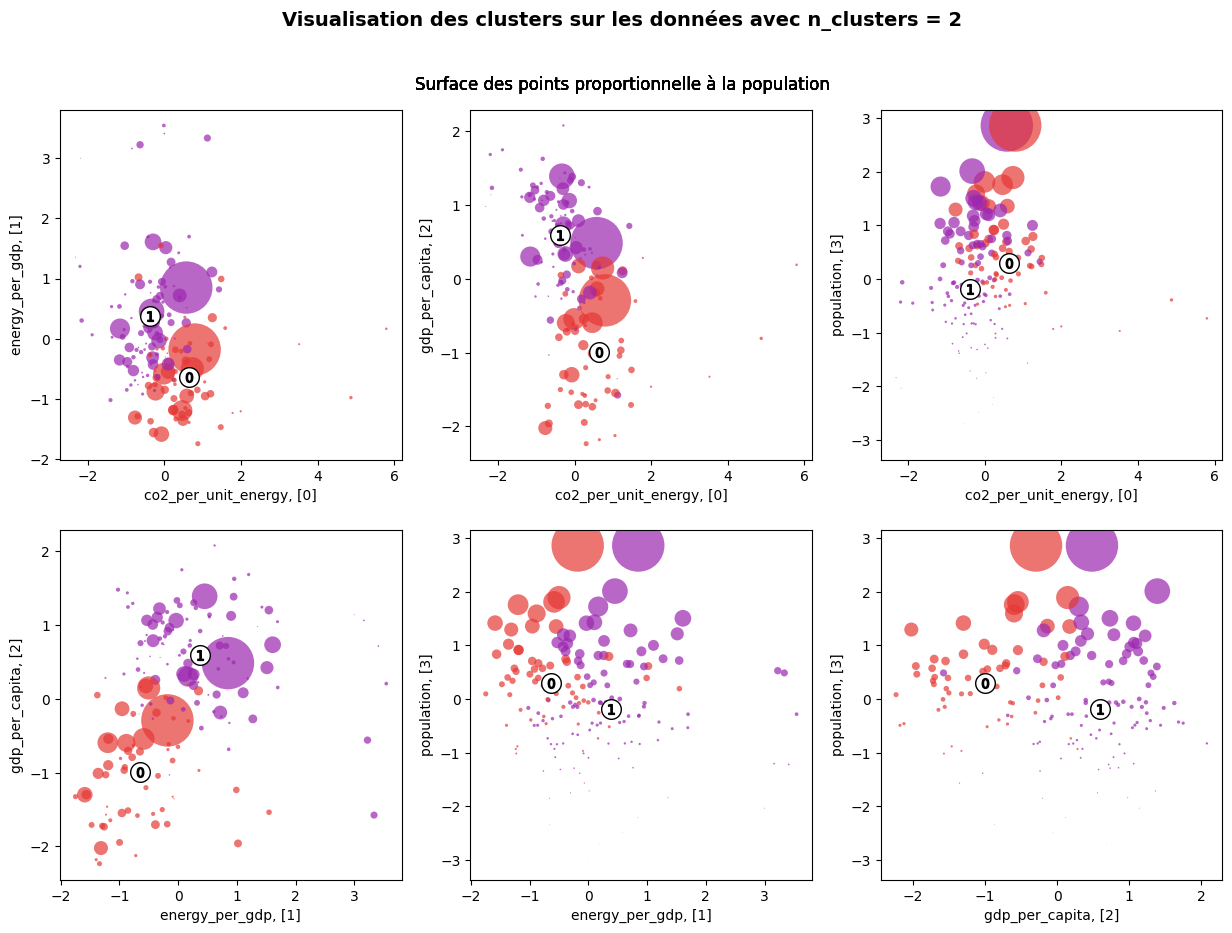

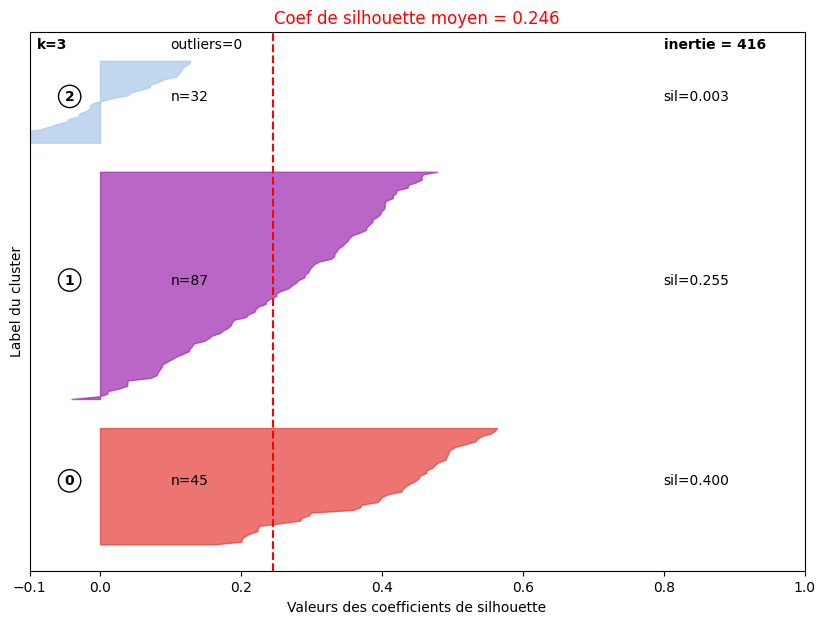

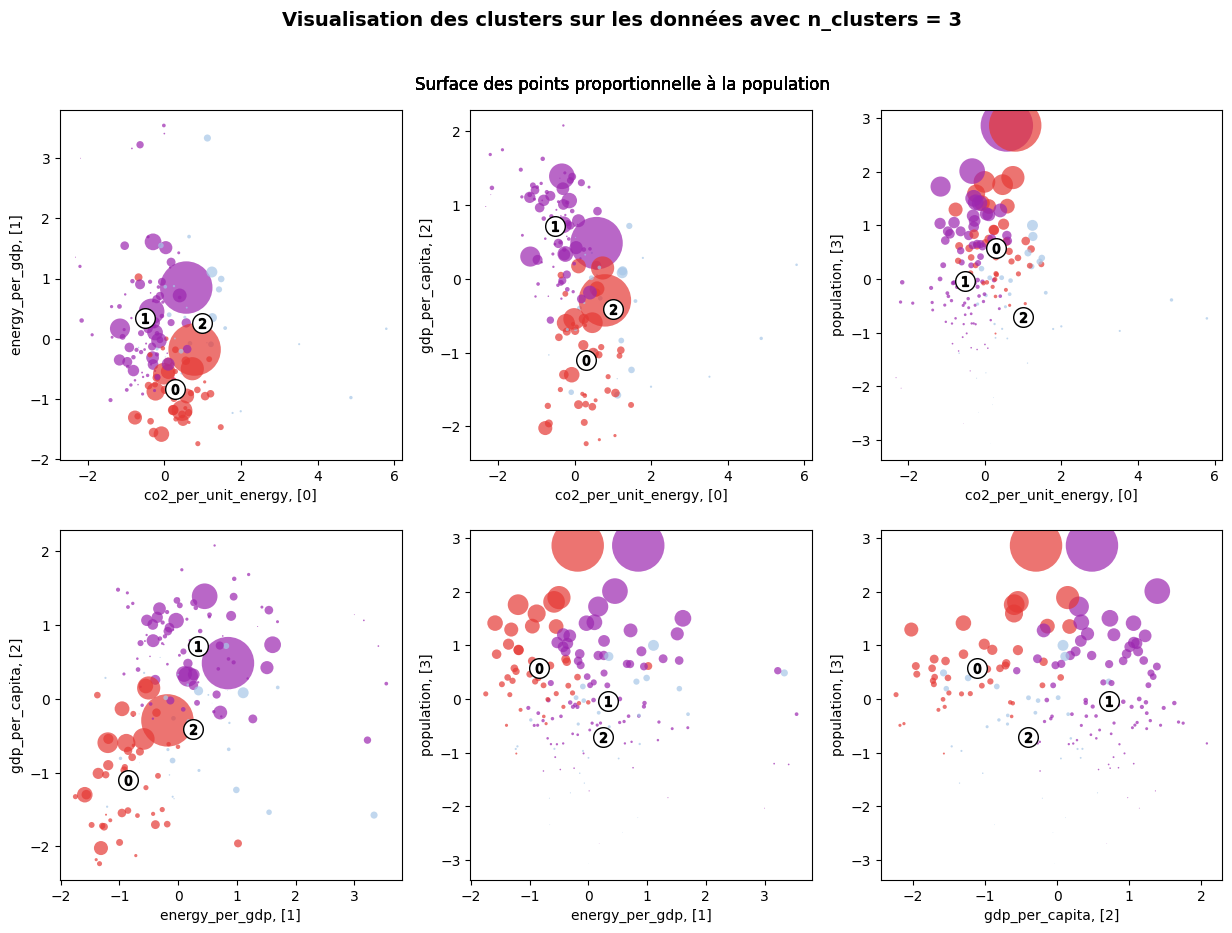

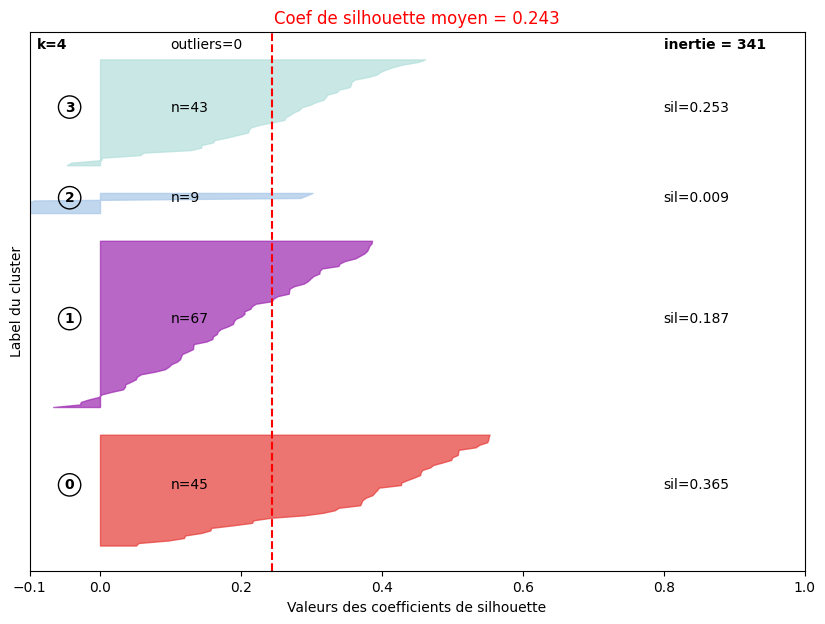

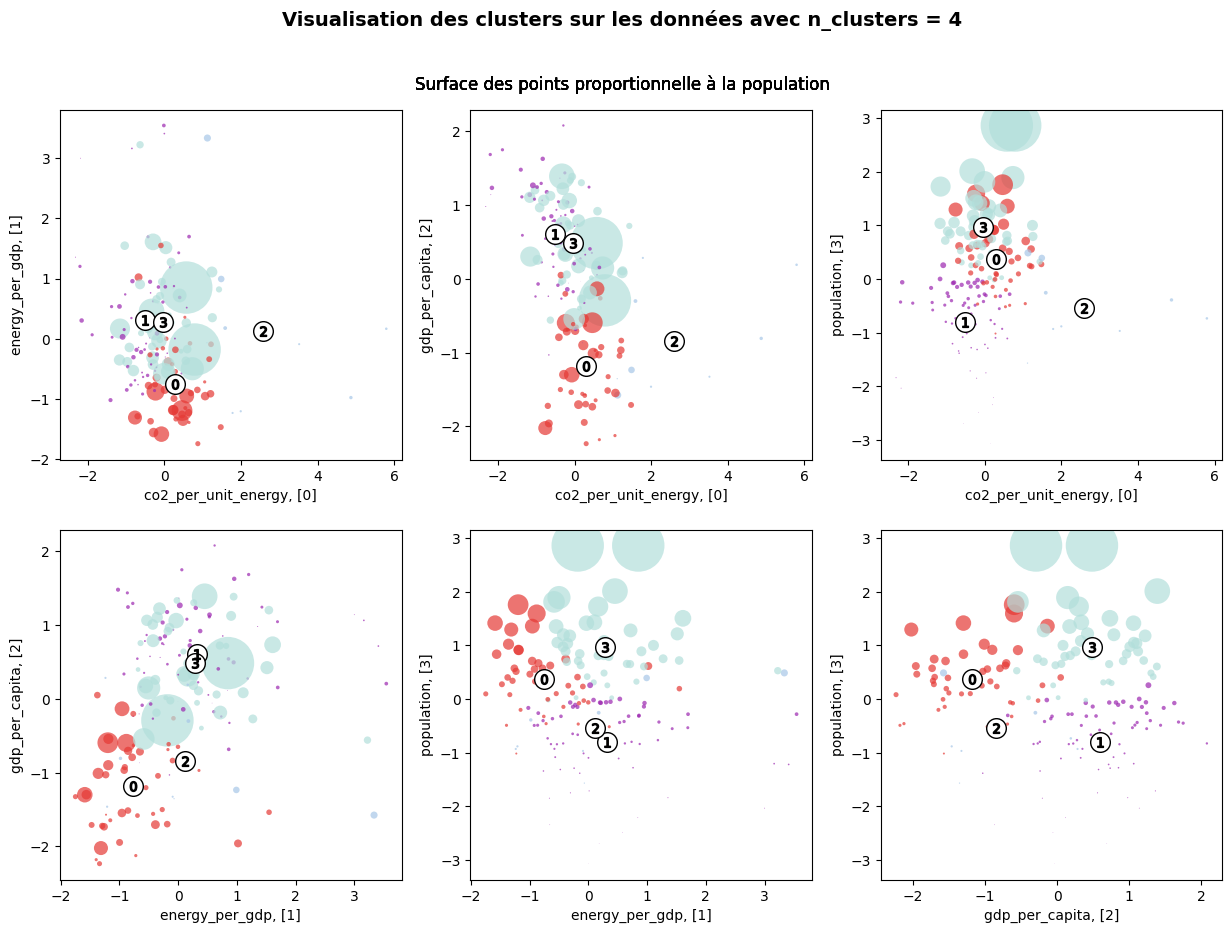

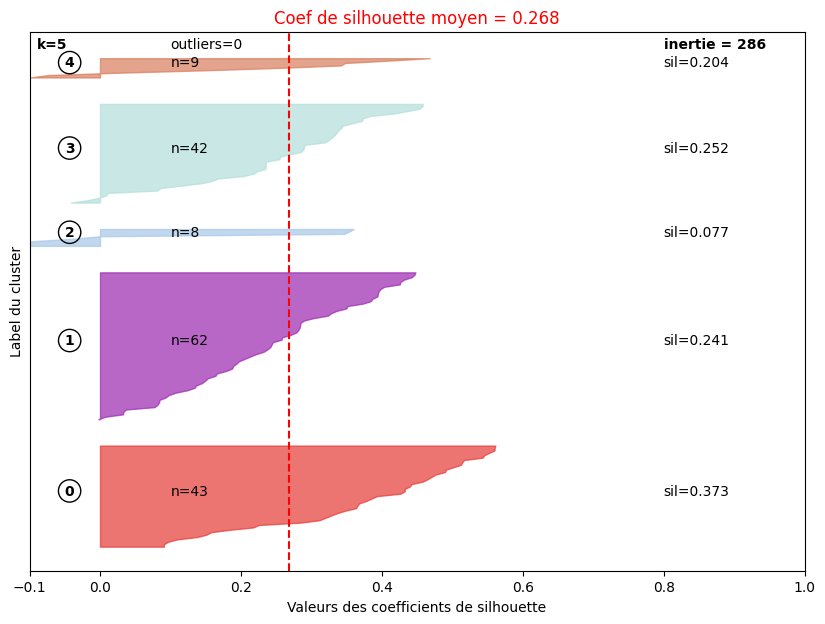

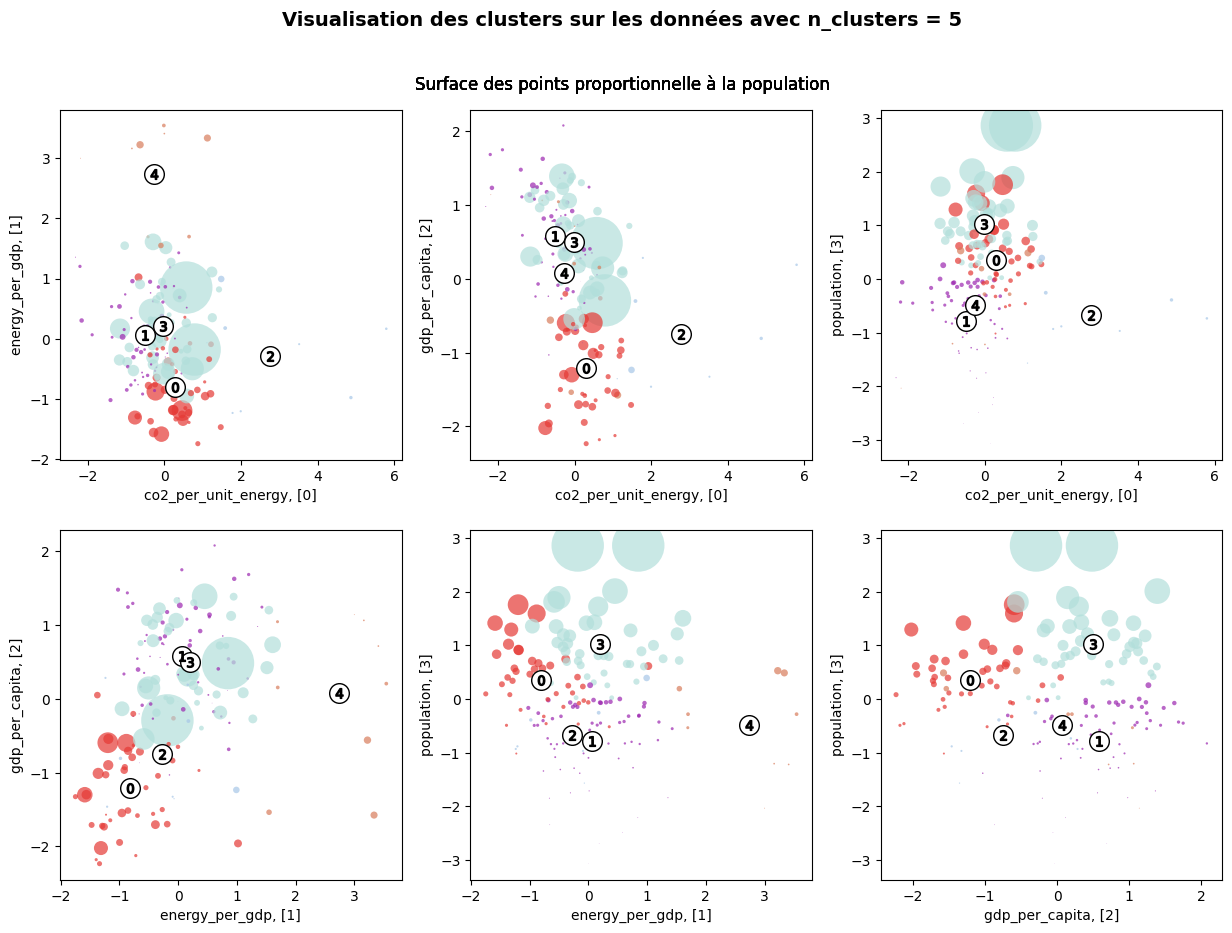

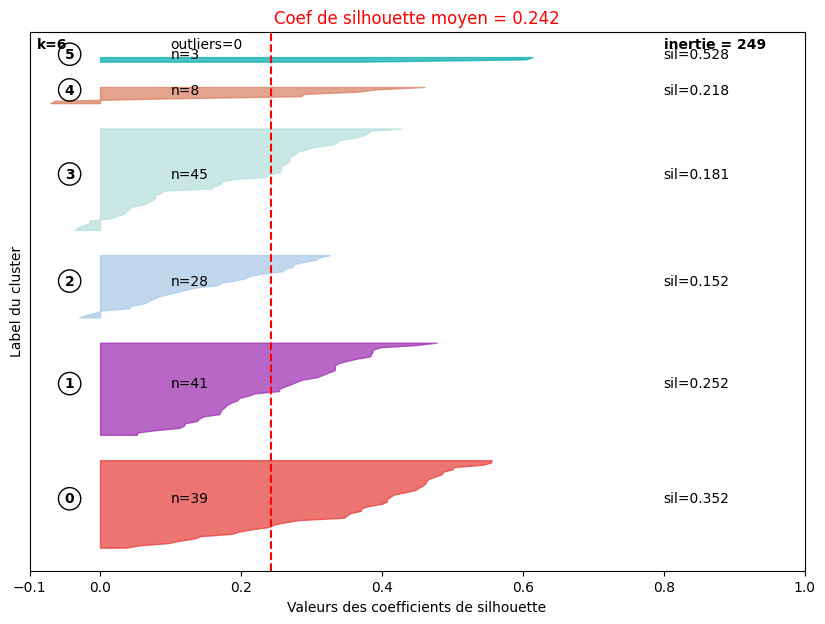

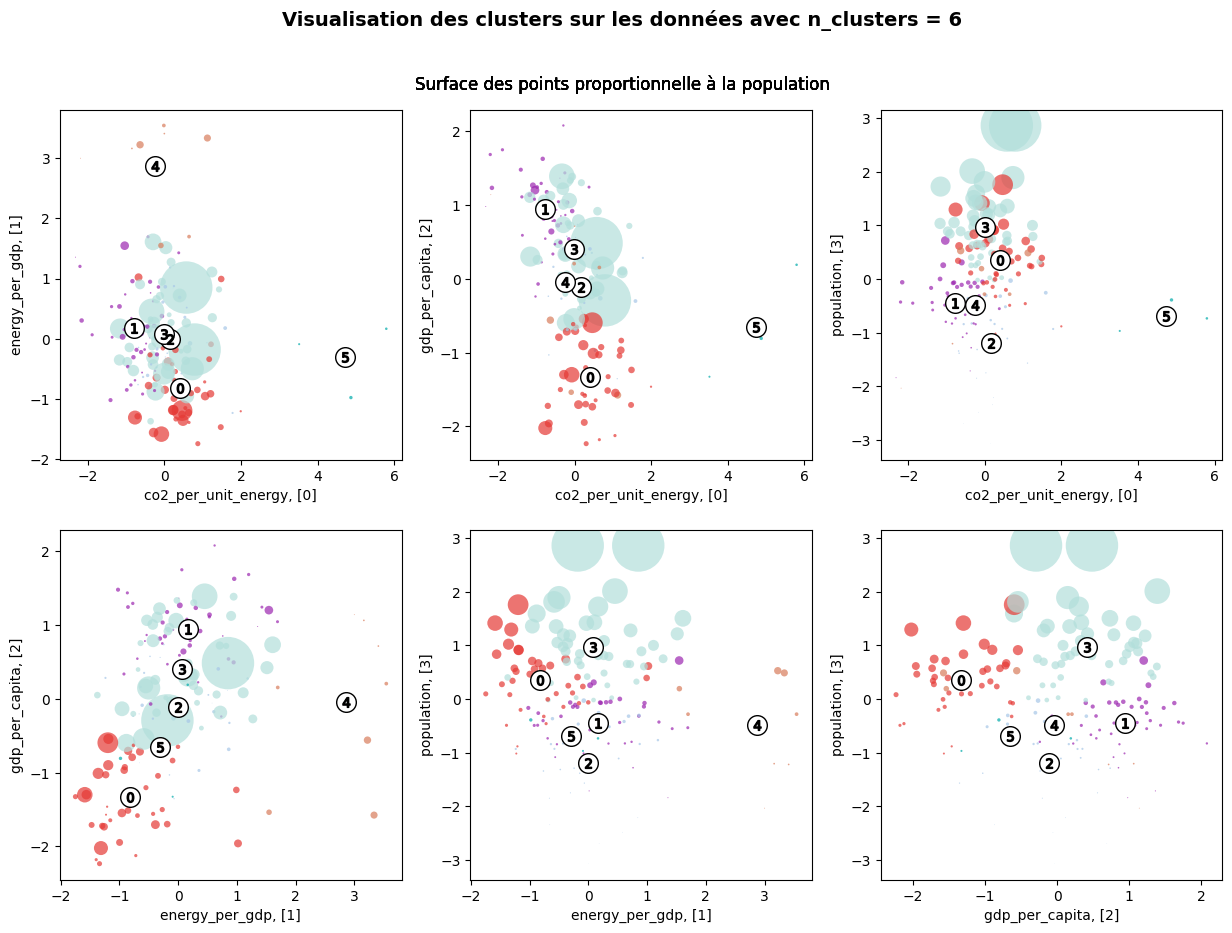

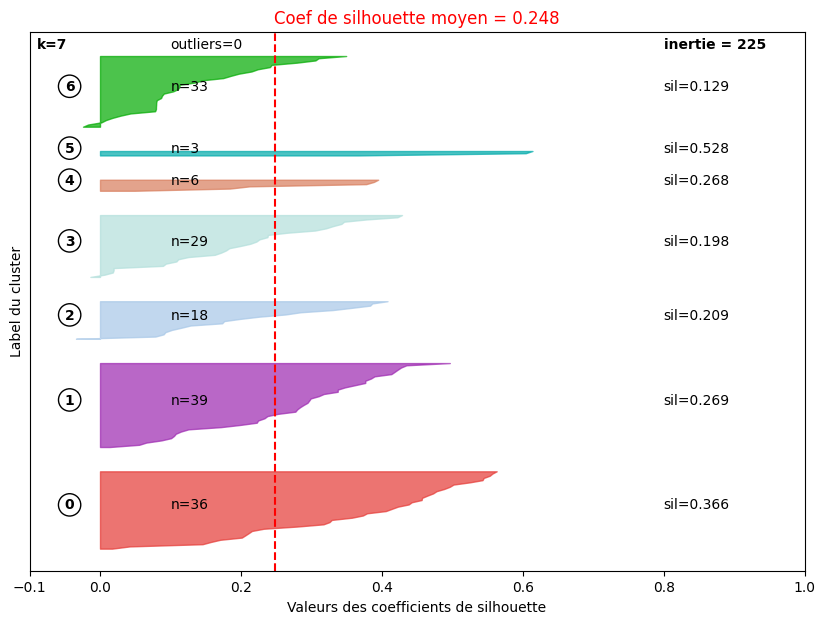

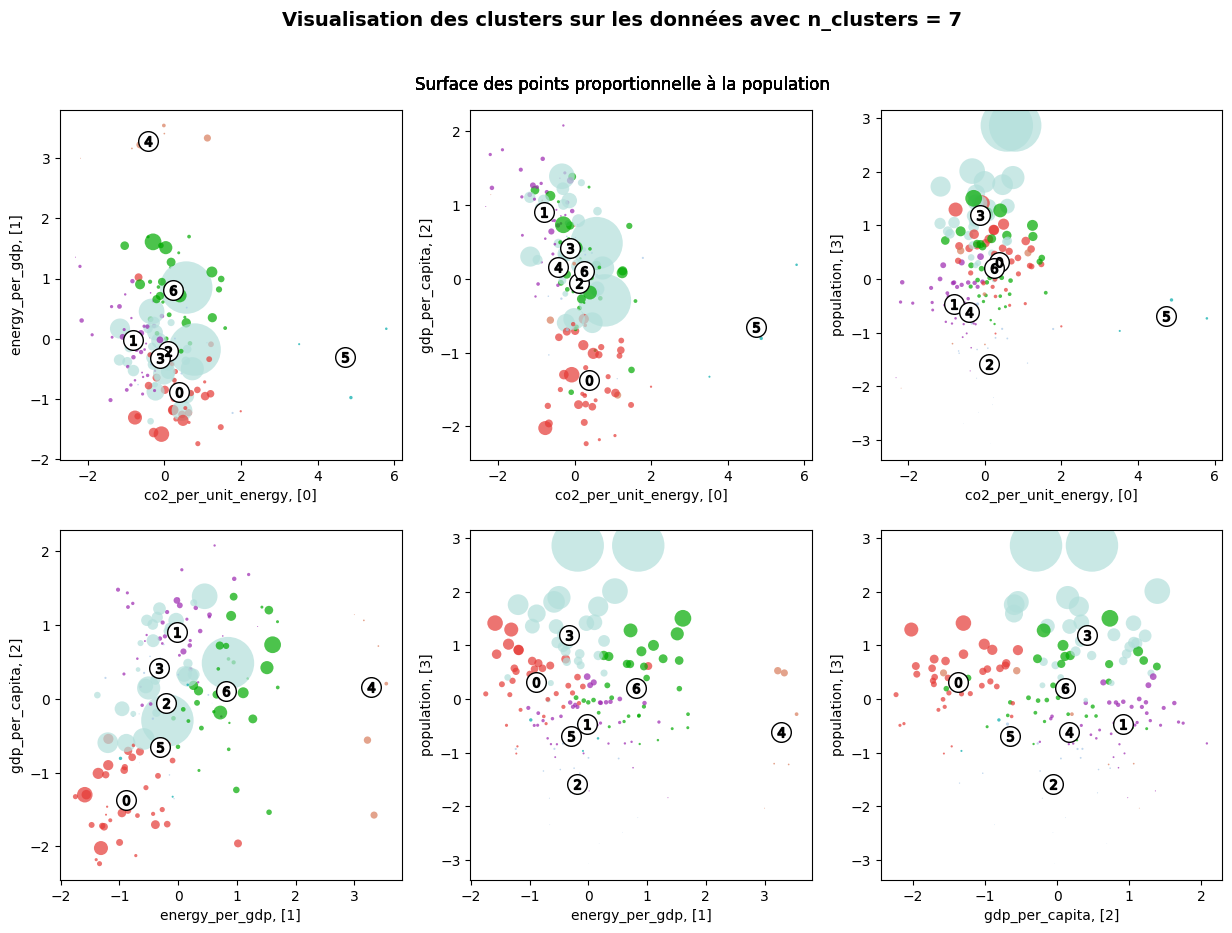

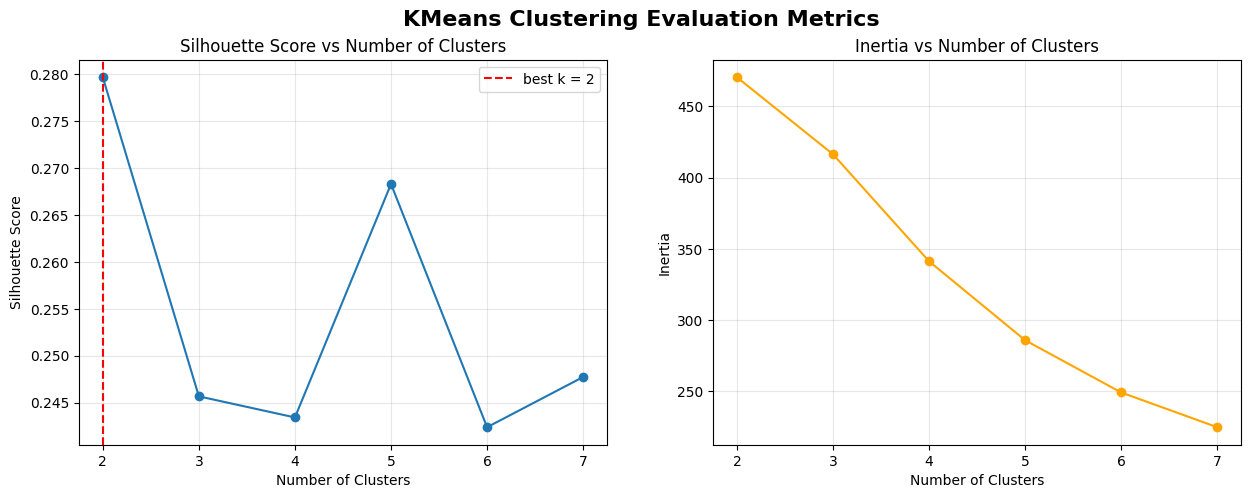

In [7]:
dfl, X =  preprocessing(df, years, countries, cols, features)
range_n_clusters = list(range(2, kmax + 1))
figs = []
silhouette_scores = []
inertia_scores = []

for k in range_n_clusters:
    # KMeans training
    # cluster_labels, centers, silhouette_avg, inertia, sample_silhouette_values= kmeans_training(X, k, seed)
    cluster_labels, centers, inertia = kmeans_training(X, k, seed)
    
    # plotting sihouette graph [optional]
    # fig1 = kmeans_silhouettes(X, k, cluster_labels, silhouette_avg, sample_silhouette_values, inertia)
    fig1 = display_silhouettes(X, k, cluster_labels, inertia=inertia)
    # plotting 2D clusters [optional]
    fig2 = display_clusters(X, k, features, centers, cluster_labels, dfl["population"])
    figs.append((fig1, fig2))
    silhouette_scores.append( silhouette_score(X, cluster_labels))
    inertia_scores.append(inertia)

fig = display_scores(range_n_clusters, silhouette_scores, inertia_scores)
figs.append(fig)

    


# 4/ Analyse - Conclusion :
Le modèle semble pertinent pour 2 ou 5 clusters, mais avec des scores silhouette faibles